In [6]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
import time
from selenium import webdriver
from bs4 import BeautifulSoup

# You need to enable the 'Allow Remote Automation' option in Safari's Develop menu to control Safari via WebDriver.  A browser will open for 10 seconds and then close

Use the url for searching ATL to PHL flights on 9/7-9/10 and only list Delta or American Airlines.

<html data-language="en_US" dir="ltr" lang="en"><head><title>ATL to PHL flights</title><meta charset="utf-8"/><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="yes" name="mobile-web-app-capable"/><meta content="#000000" name="theme-color"/><link href="/favicon.ico" rel="shortcut icon" sizes="16x16 32x32" type="image/x-icon"/><link href="/favicon.ico" rel="icon" sizes="16x16 32x32" type="image/x-icon"/><link href="/favicon.ico" rel="apple-touch-icon"/><link as="script" href="https://c.travel-assets.com/flights-shopping-pwa/l10nBundle/en_US.3a1ee44fba4c617e9bcc.js" rel="preload"/><link as="script" href="https://c.travel-assets.com/flights-shopping-pwa/app.b73ff316818cb93b7540.js" rel="preload"/><link as="script" href="https://c.travel-assets.com/flights-shopping-pwa/vendor.d863ca0b88edaa49113c.js" rel="preload"/><link as="script" href
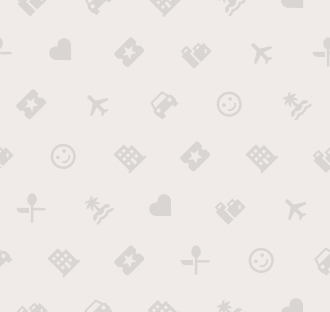

In [7]:
# open page that gives flight search results for ATL to PHL on 9/7/2023-9/10/2023
url = "https://www.expedia.com/Flights-Search?filters=%5B%7B%22preferredAirlineFilterValue%22%3A%7B%22carrierCode%22%3A%22DL%22%7D%7D%2C%7B%22preferredAirlineFilterValue%22%3A%7B%22carrierCode%22%3A%22AA%22%7D%7D%5D&leg1=from%3AAtlanta%2C%20GA%20%28ATL-Hartsfield-Jackson%20Atlanta%20Intl.%29%2Cto%3APhiladelphia%2C%20PA%20%28PHL-Philadelphia%20Intl.%29%2Cdeparture%3A9%2F7%2F2023TANYT&leg2=from%3APhiladelphia%2C%20PA%20%28PHL-Philadelphia%20Intl.%29%2Cto%3AAtlanta%2C%20GA%20%28ATL-Hartsfield-Jackson%20Atlanta%20Intl.%29%2Cdeparture%3A9%2F10%2F2023TANYT&mode=search&options=carrier%3A%2A%2Ccabinclass%3A%2Cmaxhops%3A1%2Cnopenalty%3AN&pageId=0&passengers=adults%3A1%2Cchildren%3A0%2Cinfantinlap%3AN&sortOrder=INCREASING&sortType=PRICE&trip=roundtrip"
#Use the Safari web driver for the Safari browser.  Use different webdriver for other browsers.
driver = webdriver.Safari()
#driver = webdriver.Chrome()
#driver = webdriver.ie()
#driver = webdriver.firefox()

driver.get(url)
#print(driver.page_source)
time.sleep(10)

soup = BeautifulSoup(driver.page_source, 'lxml')
driver.quit()
print(soup)

Find the cheapest flights and scrape the price, carrier and flight times

In [8]:
price_column = soup.find_all('span', attrs={'class': 'uitk-price-a11y is-visually-hidden'})
flight_times = soup.find_all('span', attrs={'data-test-id': 'departure-time'})
carriersDivs = soup.find_all('div', attrs={'data-test-id': 'flight-operated'})
#area_of_focus = soup.find('span', {'class' : 'uitk-layout-grid'})
print(price_column)
#print(flight_times[0].get_text())
#type(price_column)


[<span class="uitk-price-a11y is-visually-hidden">$224</span>, <span class="uitk-price-a11y is-visually-hidden">$224</span>, <span class="uitk-price-a11y is-visually-hidden">$224</span>, <span class="uitk-price-a11y is-visually-hidden">$232</span>, <span class="uitk-price-a11y is-visually-hidden">$232</span>, <span class="uitk-price-a11y is-visually-hidden">$232</span>, <span class="uitk-price-a11y is-visually-hidden">$232</span>, <span class="uitk-price-a11y is-visually-hidden">$232</span>, <span class="uitk-price-a11y is-visually-hidden">$232</span>, <span class="uitk-price-a11y is-visually-hidden">$234</span>, <span class="uitk-price-a11y is-visually-hidden">$234</span>, <span class="uitk-price-a11y is-visually-hidden">$234</span>, <span class="uitk-price-a11y is-visually-hidden">$252</span>, <span class="uitk-price-a11y is-visually-hidden">$252</span>, <span class="uitk-price-a11y is-visually-hidden">$252</span>, <span class="uitk-price-a11y is-visually-hidden">$252</span>, <span c

Set up lists for the 3 columns and iterate through to append each value to the list.

In [9]:
prices = []
carriers = []
flightTimes = []
for div in flight_times:
    flightTimes.append(div.get_text())

for div in carriersDivs:
    carriers.append(div.get_text())
    
for div in price_column:
    prices.append(div.get_text())
#flight_times_list = [a.GetText() for a in flight_times]
print(prices)

['$224', '$224', '$224', '$232', '$232', '$232', '$232', '$232', '$232', '$234', '$234', '$234', '$252', '$252', '$252', '$252', '$285', '$285', '$285', '$285', '$285', '$285', '$293', '$295', '$295']


Convert the lists to numpy arrays and print the results

In [10]:
npPrices = np.asarray(prices)
npCarriers = np.asarray(carriers)
npFlightTimes = np.asarray(flightTimes)

# append the numpy arrays to create a full dataframe
df = pd.DataFrame(npPrices, columns = ['Price'])
df['Carrier'] = npCarriers.tolist()
df['Flight Times'] = npFlightTimes.tolist()

print(df)
#print(type(df))

   Price                                            Carrier       Flight Times
0   $224                                  American Airlines    7:45am - 9:50am
1   $224                                  American Airlines   12:44pm - 2:50pm
2   $224                                  American Airlines  10:40am - 12:55pm
3   $232                                  American Airlines   9:03am - 12:35pm
4   $232                                  American Airlines   8:19pm - 11:54pm
5   $232                                  American Airlines   7:03am - 10:44am
6   $232  American Airlines • American Airlines 4576 ope...   5:24am - 10:44am
7   $232                                  American Airlines   7:03am - 12:35pm
8   $232                                  American Airlines    9:03am - 2:37pm
9   $234  American Airlines • American Airlines 4467 and...   9:00am - 12:55pm
10  $234  American Airlines • American Airlines 4509 and...   7:32am - 12:55pm
11  $234  American Airlines • American Airlines 4696